In [89]:
from gensim.models import Word2Vec
import gensim.downloader as api
import numpy as np
import pandas as pd
from scripts.embeddings.preprocessing import prepare_words, to_set, prepare_sentences
from scripts.embeddings.tfidf import get_matrix
from scripts.clustering.kmeans import Kmeans

In [2]:
model = api.load('word2vec-google-news-300')

In [3]:
recs = pd.read_csv("data/Recommendations.csv")

In [91]:
uniq = recs["Recommendation"].unique()

In [92]:
docs = prepare_sentences(uniq)

In [6]:
def vectorize(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model:
                try:
                    vectors.append(model[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [96]:
# matrix = vectorize(docs,model)
matrix = get_matrix(docs).toarray()

Fit 2 clusters
Fit 3 clusters
Fit 4 clusters
Fit 5 clusters
Fit 6 clusters
Fit 7 clusters
Fit 8 clusters
Fit 9 clusters
Fit 10 clusters
Fit 11 clusters
Fit 12 clusters
Fit 13 clusters
Fit 14 clusters
Fit 15 clusters
Fit 16 clusters
Fit 17 clusters
Fit 18 clusters
Fit 19 clusters
Fit 20 clusters
Fit 21 clusters
Fit 22 clusters
Fit 23 clusters
Fit 24 clusters
Fit 25 clusters
Fit 26 clusters
Fit 27 clusters
Fit 28 clusters
Fit 29 clusters
Fit 30 clusters
Fit 31 clusters
Fit 32 clusters
Fit 33 clusters
Fit 34 clusters
Fit 35 clusters
Fit 36 clusters
Fit 37 clusters
Fit 38 clusters
Fit 39 clusters
Fit 40 clusters
Fit 41 clusters
Fit 42 clusters
Fit 43 clusters
Fit 44 clusters
Fit 45 clusters
Fit 46 clusters
Fit 47 clusters
Fit 48 clusters
Fit 49 clusters
Fit 50 clusters
Fit 51 clusters
Fit 52 clusters
Fit 53 clusters
Fit 54 clusters
Fit 55 clusters
Fit 56 clusters
Fit 57 clusters
Fit 58 clusters
Fit 59 clusters
Fit 60 clusters
Fit 61 clusters
Fit 62 clusters
Fit 63 clusters
Fit 64 clusters


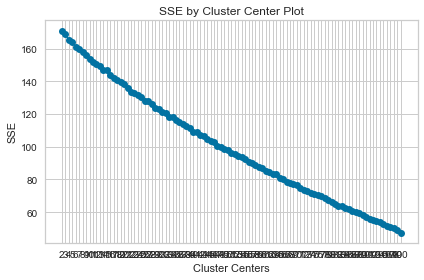

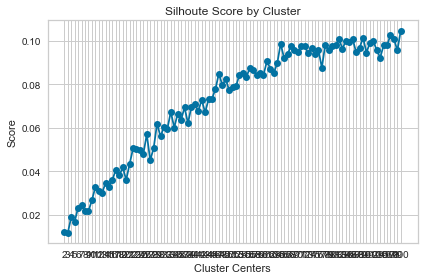

In [97]:
Kmeans(matrix).find_k(100)

In [104]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(min_samples=10,eps=0.5) # you can change these parameters, given just for example 
cluster_labels = dbscan.fit(matrix) # where X - is your matrix, where each row corresponds to one document (line) from the docs, you need to cluster

In [105]:
clusters = cluster_labels.labels_
clustered_df = pd.DataFrame([pd.Series(uniq),pd.Series(clusters)],index=["Recommendation","Cluster"]).T
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [106]:
clustered_df.groupby("Cluster").count()

,Recommendation
Cluster,
-1,179
